# Guia para hacer un modelo de ia del examen


## Ejercicio 1: Limpiar los datos



### QUITANDO FILAS Y COLUMNAS Y NORMALIZANDO DATOS

Para normalizar los datos hay que tener en cuenta que:
    
    Discretos/Enumerados/Cualitativos -> OneHotEncoding o Labled Encoder
        OneHotEncoding -> por defecto, si dudas usa este
        LabledEncoder -> si los valores tienen un orden

    Continuos -> StandardScaling, para normalizarlos y llevarlos a una escala comun



    -> solo deberia hacer falta copiar este codigo y cambiar las columnas en ATRIBUTOS, en final_data salen todos los datos sin el atributo solucion y en labeled_data el solucion

In [25]:
# imports
import glob as glob
import pandas as pd

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder


# ---------------------------- / LECTURA DE DATOS / ----------------------------------
data = pd.read_csv("dementia_dataset.csv") 



# --------------- / ATRIBUTOS / ---------------------
unnecessary_columns = [
    "Subject ID", 
    "MRI ID", 
    "Hand"          #
    ]
oneHot_columns = [
    "M/F"
    ]
standardScaling_columns = [
    "EDUC",
    "SES",
    "MMSE",
    "CDR",
    "eTIV",
    "nWBV",
    "ASF",
    "Visit",        #
    "MR Delay"
]
labeled_columns = [         # en este caso solo hay una columna que queramos, como es la solucion la codificamos por separado
    "Group"
    ]  
solucion = "Group"



# ---------------- / DROP /  -------------------
# pandas tiene la opcion de quitar columnas segun sus nombres
final_data = data.drop(columns=unnecessary_columns) 
# ----------------------------------------------------------------------



# ---------------- / OHE /  -------------------
encoder = OneHotEncoder(sparse_output=False) 
encoder_final = encoder.fit_transform(data[oneHot_columns])  
oneHot_df = pd.DataFrame(encoder_final, columns=encoder.get_feature_names_out(oneHot_columns))
# ----------------------------------------------------------------------



# ---------------- / SS /  -------------------
scaler = StandardScaler()
scaler_final = scaler.fit_transform(data[standardScaling_columns])
df_sc = pd.DataFrame(scaler_final, columns=standardScaling_columns, index=data.index)
# ----------------------------------------------------------------------



# ----------------- / LABELED ENCODER / -------------------------   
labler = LabelEncoder()
labeled_final = labler.fit_transform(data[labeled_columns])
df_lbl = pd.DataFrame(labeled_final, columns=labeled_columns, index=data.index)
# ----------------------------------------------------------------------



# junta el df sin las columnas del oneHot con las del oneHot en el eje de columnas
final_data = pd.concat([df_sc, oneHot_df], axis=1)
final_data = pd.concat([final_data, df_lbl], axis=1)

# quita los NaN
final_data = final_data.dropna(how="any")

# los separa
labeled_data = final_data[solucion]
final_data = final_data.drop(columns=[solucion]) 

# para guardarlas en un archivo (opcional)
#final_data.to_csv("./examen.csv", index=False)


c:\Users\Ines\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Slices en Python (resumen rapido)

In [20]:
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
start = 0
stop = 2
step = 1

a[start:stop]  # items start through stop-1
a[start:]      # items start through the rest of the array
a[:stop]       # items from the beginning through stop-1
a[:]           # a copy of the whole array

# ---------------------------------------------

a[start:stop:step] # start through not past stop, by step

# ---------------------------------------------

a[-1]    # last item in the array
a[-2:]   # last two items in the array
a[:-2]   # everything except the last two items

# ---------------------------------------------

a[::-1]    # all items in the array, reversed
a[1::-1]   # the first two items, reversed
a[:-3:-1]  # the last two items, reversed
a[-3::-1]  # everything except the last two items, reversed


[7, 6, 5, 4, 3, 2, 1, 0]

In [21]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
#import pandas as pd     # pandas ya estaba importado
import Utils as utl

In [22]:

# lee los datos
data = pd.read_csv("cleanData.csv")

# variable para guardar los datos temporalmente, por si acaso 
temp_data = data


# ----------------- / ONE HOT ENCODER / -------------------------
# nombre de las columnas cualitativas
oneHot_columns = [
    "NEIGHBORHOOD_UP",
    "NEIGHBORHOOD_DOWN",
    "NEIGHBORHOOD_RIGHT",
    "NEIGHBORHOOD_LEFT"
]


# creamos el encoder
encoder = OneHotEncoder(sparse_output=False)   # queremos que sea sparse?¿
# le decirmos las columnas que queremos codificar
encoder_data = data[oneHot_columns]
# las ajustamos
encoder_final = encoder.fit_transform(encoder_data)  

# dbug
print(encoder_final.shape)

# le metemos todos los datos menos los del OneHot
final_data = temp_data.drop(columns=oneHot_columns)
# hacemos un dataFrame de pandas para poder meter los nombres de las columas nuevas
oneHot_df = pd.DataFrame(encoder_final, columns=encoder.get_feature_names_out(oneHot_columns))
# junta el df sin las columnas del oneHot con las del oneHot en el eje de columnas
final_data = pd.concat([final_data, oneHot_df], axis=1)



# ----------------- / LABELED ENCODER / -------------------------
# en este caso solo hay una columna que queramos, como es la solucion la codificamos por separado
labeled_columns =  "action"       

# crea el encoder
labler = LabelEncoder()
# transformamos la variable
labeled_final = labler.fit_transform(data[labeled_columns])

# intercambia la columna antigua con la nueva
final_data[labeled_columns] = labeled_final



# ----------------- / STARNDARD SCALING / -------------------------
standardScaling_columns = [
    "NEIGHBORHOOD_DIST_UP",
    "NEIGHBORHOOD_DIST_DOWN",
    "NEIGHBORHOOD_DIST_RIGHT",
    "NEIGHBORHOOD_DIST_LEFT",
    "AGENT_1_X",
    "AGENT_1_Y",
    "AGENT_2_X",
    "AGENT_2_Y",
    "EXIT_X",
    "EXIT_Y",
    "time"
]

# crea el encoder
scaler = StandardScaler()
# coge las columnas que necesita
scaler_data = data[standardScaling_columns]
# las normaliza
scaler_final = scaler.fit_transform(scaler_data)
# las intercambia
final_data[standardScaling_columns] = scaler_final


# ----------------- / GUARDADO / -------------------------
final_data.to_csv("preprocessedData.csv", index=False)

(29253, 20)


## Ejercicio 2: Representar los datos
(WIP)


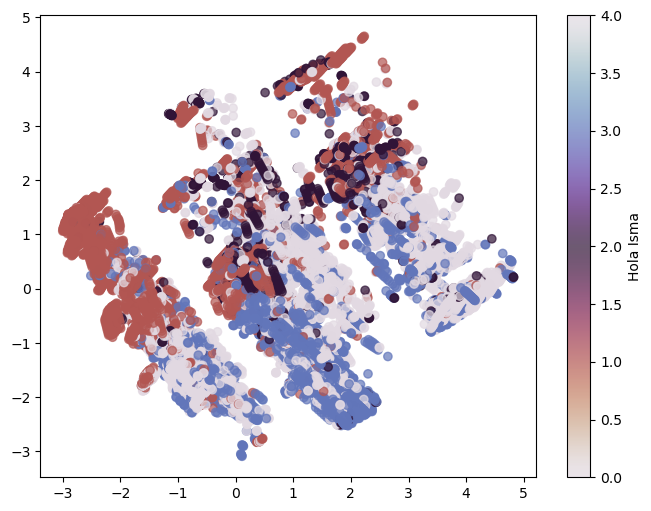

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# para estos hay que estar en el entorno, mejor abrir con anaconda
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt


# ---------------- / LECTURA / ---------------------
# estamos usando los datos ya normalizados 
data = pd.read_csv("preprocessedData.csv")  # abre el archivo de los datos limpios y preprocesados


# -------------------- / FILTRADO DE DATOS / -------------------
# selecciona las columnas innecesarias que no queramos represetar
unnecessary_columns = ["action"]
# coge los atributos que queramos representar
atributes = data.drop(columns=unnecessary_columns)   # coge la primera columna MENOS la de action lmao
# para el color cogemos el dato solucion
color = data["action"]  #codificando cada action como un color

# ------------------- / DISMINUCION DE DIMENSIONES / ------------------------ 

# MOMENTO PCA: 
# eL PCA lo que hace es minimizar linealmente el numero de atributos que queramos representar segun sus correlaciones, 
# es decir, intenta sacar las x variables mas representativas
# indicamos cuantos componentes queremos, como queremos hacer la representacion visual ponemos 2
pca_comp = PCA(n_components=2)
hola = pca_comp.fit_transform(atributes)

# ---------------------------- / PINTADO / ------------------------ 

# pintamos la tabla
plt.figure(figsize=(8,6))

# pintamos los datos
scatter = plt.scatter(     
    hola[:, 0],                 # eje x
    hola[:, 1],                 # eje y
    c = color.astype(int),      # color             
    cmap = "twilight_r",        # paleta
    alpha = 0.7                 # alfa
)

# pintamos la barra 
plt.colorbar(scatter, label="Hola Isma")

# enseñamos la frafica
plt.show()

## Ejercicio 3: MLP

In [26]:
import MLP_Complete as mlp
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

X = final_data.values
y = labeled_data.values

# separa los datos 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Tips:

Iteration      1: Cost   2.0169   
Iteration    101: Cost   1.6673   
Iteration    201: Cost   1.6602   
Iteration    301: Cost   1.1340   
Iteration    401: Cost   0.6116   
Iteration    501: Cost   0.5946   
Iteration    601: Cost   0.5769   
Iteration    701: Cost   0.5559   
Iteration    801: Cost   0.5336   
Iteration    901: Cost   0.5098   
Iteration   1001: Cost   0.4803   
Iteration   1101: Cost   0.4454   
Iteration   1201: Cost   0.4155   
Iteration   1301: Cost   0.3959   
Iteration   1401: Cost   0.4136   
Iteration   1501: Cost   0.3841   
Iteration   1601: Cost   0.3748   
Iteration   1701: Cost   0.3661   
Iteration   1801: Cost   0.3563   
Iteration   1901: Cost   0.3453   
Iteration   2000: Cost   0.3337   
-> Validacion Custom MLP: 85.39%


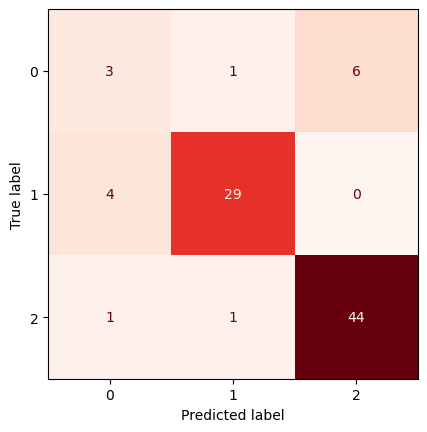

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

# esto no lo entiendo AUN
y_train = y_train.reshape(-1, 1)
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train)

# valores que vamos tocando
LAYERS=(128, 64, 32)
LAMBDA=0.001
LR_INIT=0.5
ITERATIONS=2000

# mlp
mlp_custom = mlp.MLP_Complete(inputLayer=X_train.shape[1], 
                              hiddenLayers=list(LAYERS), 
                              outputLayer=y_train_encoded.shape[1], 
                              seed=42)
mlp_custom.backpropagation(X_train, 
                        y_train_encoded, 
                        alpha=LR_INIT, 
                        lambda_=LAMBDA, 
                        numIte=ITERATIONS, 
                        verbose=100)

a, z = mlp_custom.feedforward(X_test)
y_pred = mlp_custom.predict(a[-1])
    


# resultados
acc_custom = accuracy_score(y_test, y_pred)
print(f"-> Validacion Custom MLP: {acc_custom * 100:.2f}%")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Reds", colorbar=False)


## Ejercicio 4: Otros modelos

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

### MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

# codigo del mlp de sklearn

# valores que vamos tocando
LAYERS=(62, 70)
LAMBDA=0.001
LR_INIT=0.5
ITERATIONS=10000

mlp_sklearn = MLPClassifier(
        hidden_layer_sizes=LAYERS,
        activation='logistic',     
        solver='sgd',             
        max_iter=ITERATIONS,
        learning_rate="constant",
        learning_rate_init=LR_INIT,
        alpha=LAMBDA,             
        random_state=42,
        n_iter_no_change=100,
        verbose=True
    )

mlp_sklearn.fit(X_train, y_train_lbl)

y_pred_sklearn = mlp_sklearn.predict(X_test)

acc_sklearn = accuracy_score(y_test_lbl, y_pred_sklearn)

print(f"-> Validacion SKLearn MLP: {acc_sklearn * 100:.2f}%")

Iteration 1, loss = 1.31233491
Iteration 2, loss = 0.93885627
Iteration 3, loss = 0.87009020
Iteration 4, loss = 0.82499923
Iteration 5, loss = 0.78453479
Iteration 6, loss = 0.75533304
Iteration 7, loss = 0.73528610
Iteration 8, loss = 0.71801272
Iteration 9, loss = 0.70213322
Iteration 10, loss = 0.68532966
Iteration 11, loss = 0.67189501
Iteration 12, loss = 0.65900432
Iteration 13, loss = 0.65048135
Iteration 14, loss = 0.63729594
Iteration 15, loss = 0.62595789
Iteration 16, loss = 0.61802895
Iteration 17, loss = 0.60797876
Iteration 18, loss = 0.59997721
Iteration 19, loss = 0.58831998
Iteration 20, loss = 0.58168386
Iteration 21, loss = 0.57483148
Iteration 22, loss = 0.56780818
Iteration 23, loss = 0.56672693
Iteration 24, loss = 0.55856017
Iteration 25, loss = 0.55171720
Iteration 26, loss = 0.54726942
Iteration 27, loss = 0.54395232
Iteration 28, loss = 0.53732945
Iteration 29, loss = 0.53518579
Iteration 30, loss = 0.53252309
Iteration 31, loss = 0.52621266
Iteration 32, los

### Decision Tree

In [ ]:
# codigo del decision tree

dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train_lbl)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test_lbl, y_pred_dt)

print(f"-> Validacion DT: {acc_dt * 100:.2f}%")

### KNN

In [ ]:
# codigo del KNN

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train_lbl)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test_lbl, y_pred_knn)

print(f"-> Validacion KNN: {acc_knn * 100:.2f}%")

### Random Forest

In [ ]:
# codigo del random forest

rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
rf.fit(X_train, y_train_lbl)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test_lbl, y_pred_rf)

print(f"-> Validacion RF: {acc_rf * 100:.2f}%")

## Ejercicio 5: Metricas

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Text(0.5, 1.0, 'SKLearn\nAcc: 85.30%')

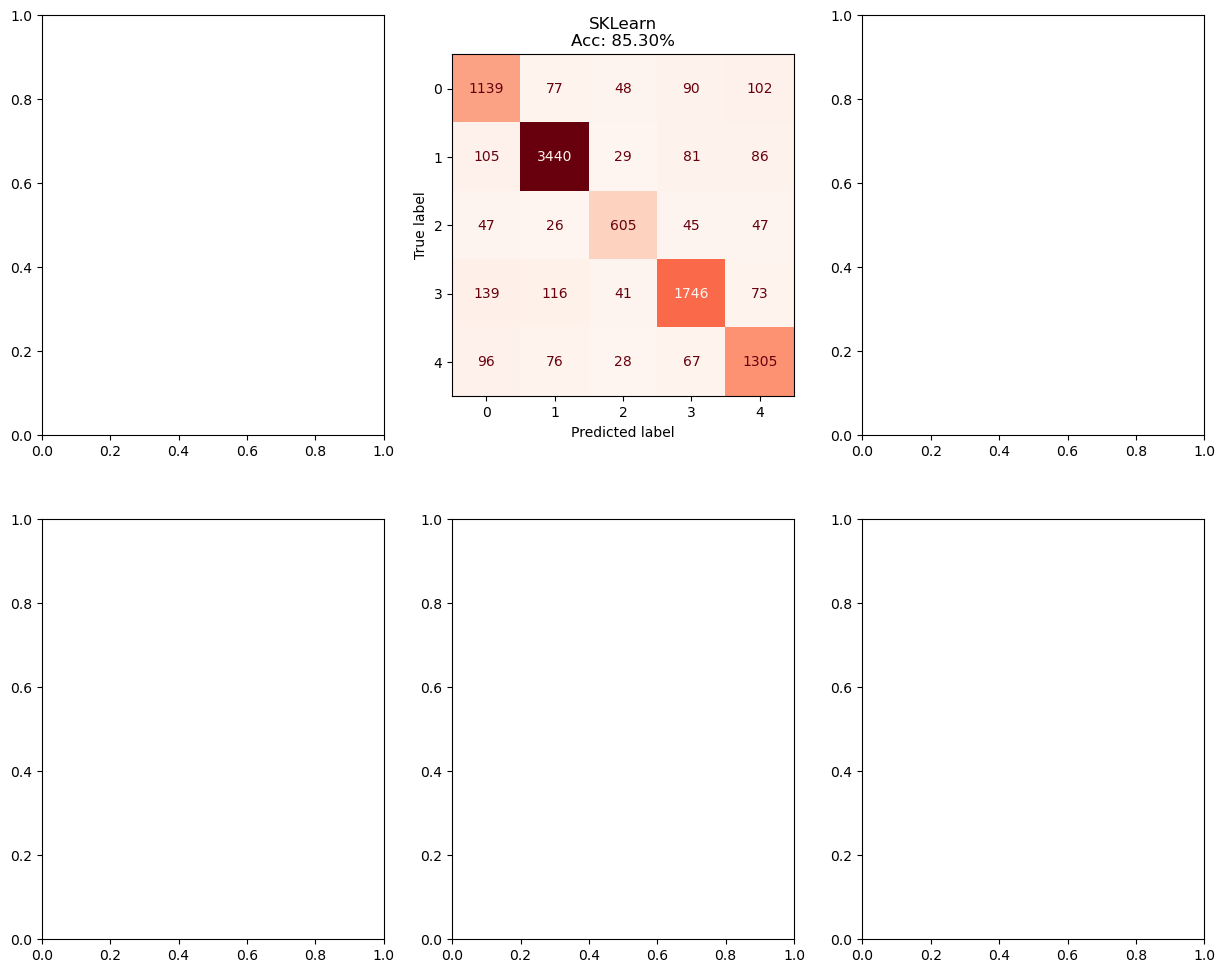

In [ ]:
# Matriz de confusion

fig, axes = plt.subplots(2, 3, figsize=(15, 12))
axes = axes.flatten()

ConfusionMatrixDisplay.from_predictions(y_test_lbl, y_pred_sklearn, ax=axes[1], cmap="Reds", colorbar=False)
axes[1].set_title(f"SKLearn\nAcc: {acc_sklearn * 100:.2f}%")

#ConfusionMatrixDisplay.from_predictions(y_test_lbl, y_pred_knn, ax=axes[2], cmap="Reds", colorbar=False)
#axes[2].set_title(f"KNN\nAcc: {acc_knn * 100:.2f}%")

#ConfusionMatrixDisplay.from_predictions(y_test_lbl, y_pred_rf, ax=axes[3], cmap="Reds", colorbar=False) 
#axes[3].set_title(f"RF\nAcc: {acc_rf * 100:.2f}%")

#ConfusionMatrixDisplay.from_predictions(y_test_lbl, y_pred_dt, ax=axes[4], cmap="Reds", colorbar=False) 
#axes[4].set_title(f"DT\nAcc: {acc_rf * 100:.2f}%")